In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model,datasets
from sklearn.metrics import mean_squared_error

In [5]:
da = pd.read_csv(r"D:\ml\turkish\turkiye.csv")

In [7]:
da

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
6,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,1,2,1,1,3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
9,1,2,1,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [8]:
da.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [10]:
def missing_percentage(data1, col_name = "Missing value (%)"):
    # Calculating the missing percentage
    missing_df1 = pd.DataFrame(data1.isnull().sum() /len(data1)*100, columns = [col_name])
    # Forming the output dataframe
    missing_df = pd.DataFrame({'Data': missing_df1.iloc[:, 0]})
    return missing_df

missing_percentage(da)

,Data
instr,0.0
class,0.0
nb.repeat,0.0
attendance,0.0
difficulty,0.0
Q1,0.0
Q2,0.0
Q3,0.0
Q4,0.0
Q5,0.0


In [11]:
"""
Exploratory Data Analysis
As we have checked our data for the missing values, let shift our focus in understanding the data in much better way. Ww will be using visualization in order to do Exploratory Data Analysis(EDA). EDA is an approach for data analysis that employs a variety of techniques mostly graphical to

Maximize insight into a data set
Uncover underlying structure
Extract important variables
Detect outliers and anomalies
Test underlying assumptions
Develop parsimonious models
Determine optimal factor settings"""

'\nExploratory Data Analysis\nAs we have checked our data for the missing values, let shift our focus in understanding the data in much better way. Ww will be using visualization in order to do Exploratory Data Analysis(EDA). EDA is an approach for data analysis that employs a variety of techniques mostly graphical to\n\nMaximize insight into a data set\nUncover underlying structure\nExtract important variables\nDetect outliers and anomalies\nTest underlying assumptions\nDevelop parsimonious models\nDetermine optimal factor settings'

In [15]:

da.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [16]:
da.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


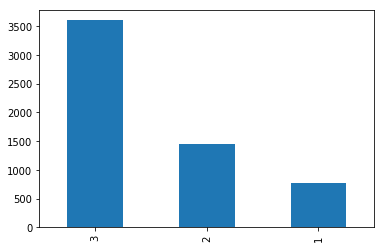

In [17]:
da['instr'].value_counts().plot.bar()

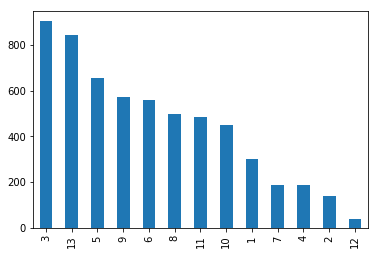

In [46]:

da['class'].value_counts().plot.bar()

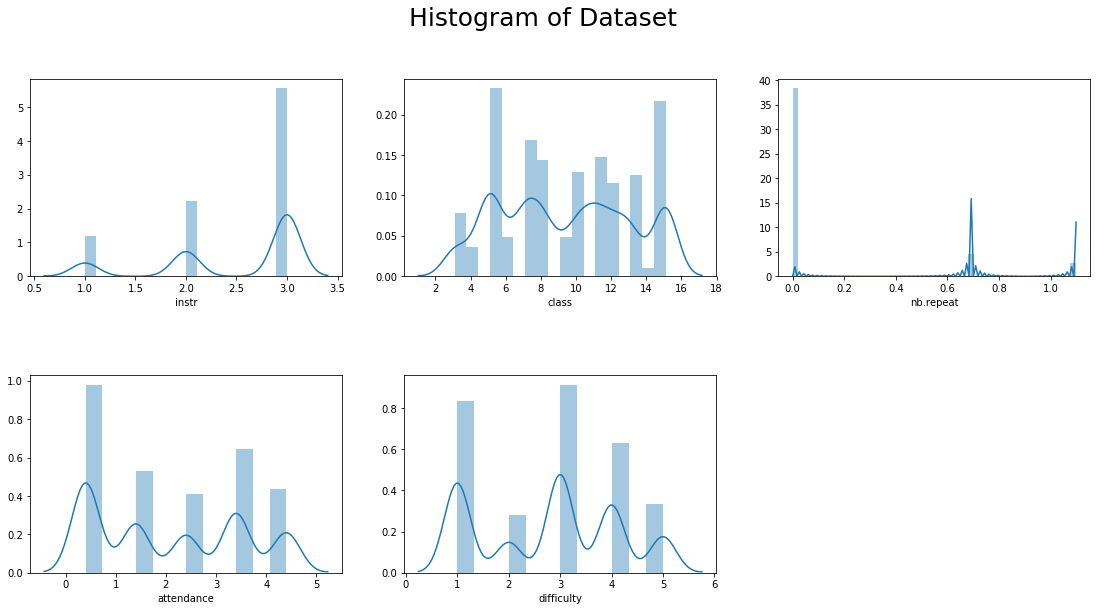

In [84]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=25, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        sns.distplot(da.iloc[:, i], ax=ax)

    # Show the plot
    plt.show()
    
subplot_hist(da.iloc[:, :5], row = 4, column = 3, title = "Histogram of Dataset")

In [86]:
# for finding skew value
from scipy import stats as st 

# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Red Wine
skewness_check(da.iloc[:, :5])

,Column,Skewness,Skew Category
0,instr,-1.026862,Heavily Skewed
1,class,0.060058,Light Skewed
2,nb.repeat,2.148669,Heavily Skewed
3,attendance,0.230031,Light Skewed
4,difficulty,-0.009200,Light Skewed


In [116]:
da[["attendance"]] += 0.1
da[["nb.repeat"]]+=.1
def boxcox_trans(data):
    for i in range(data.shape[1]):
        data.iloc[:, i], _ = st.boxcox(data.iloc[:, i])
    return data
# Subset the predcitors
red_trans = da.copy(deep = True)
red_trans.iloc[:, :-1] = boxcox_trans(red_trans.iloc[:, :5])
skewness_check(red_trans.iloc[:, :5])

,Column,Skewness,Skew Category
0,instr,-0.638910,Heavily Skewed
1,class,-0.114530,Light Skewed
2,nb.repeat,1.890556,Heavily Skewed
3,attendance,-0.087933,Light Skewed
4,difficulty,-0.190376,Light Skewed


In [101]:
print('Skewness',red_trans['nb.repeat'].skew())

Skewness 1.891042535463313


In [115]:
print('Skewness',red_trans['nb.repeat'].skew())


Skewness 0.5495401130828728


,Column,Skewness,Skew Category
0,instr,-0.638910,Heavily Skewed
1,class,-0.114530,Light Skewed
2,nb.repeat,1.890580,Heavily Skewed
3,attendance,-0.200855,Light Skewed
4,difficulty,-0.190376,Light Skewed


Skewness 1.8910439107986563


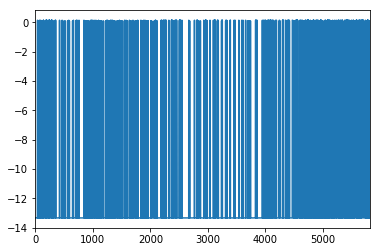

In [117]:

red_trans['nb.repeat'].plot()
print('Skewness',red_trans['nb.repeat'].skew())

In [120]:
dataset_questions = da.iloc[:,5:33]

In [121]:

dataset_questions

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
6,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
9,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [114]:
#lets do a PCA for feature dimensional reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
dataset_questions_pca = pca.fit_transform(dataset_questions)

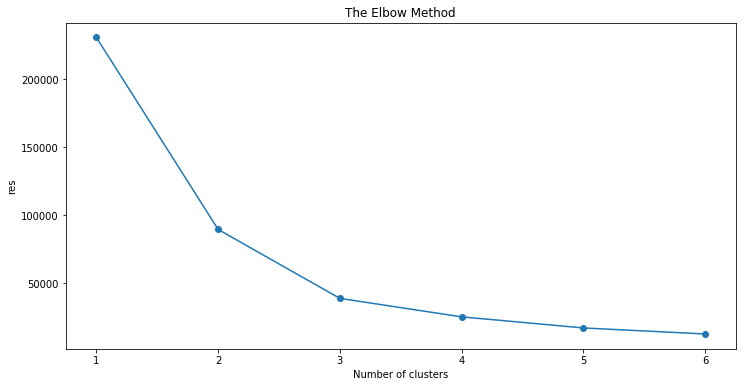

In [75]:
from sklearn.cluster import KMeans
res=[]
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_questions_pca)
    res.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1, 7), res,marker = "o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('res')
plt.show()

In [76]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(dataset_questions_pca)

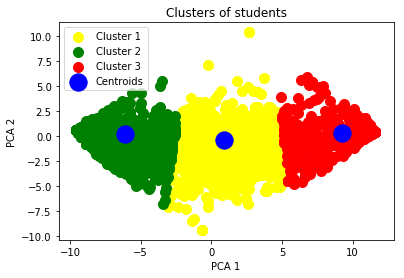

In [77]:
# Visualising the clusters
plt.scatter(dataset_questions_pca[y_kmeans == 0, 0], dataset_questions_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(dataset_questions_pca[y_kmeans == 1, 0], dataset_questions_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(dataset_questions_pca[y_kmeans == 2, 0], dataset_questions_pca[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


In [43]:
dataset_questions_pca.shape

(5820, 2)

In [78]:
da.skew()

instr        -1.027127
class         0.060074
nb.repeat     2.437728
attendance    0.230091
difficulty   -0.009203
Q1           -0.046117
Q2           -0.204447
Q3           -0.317940
Q4           -0.206563
Q5           -0.217527
Q6           -0.229545
Q7           -0.188606
Q8           -0.134326
Q9           -0.278673
Q10          -0.201412
Q11          -0.296708
Q12          -0.144075
Q13          -0.377429
Q14          -0.431960
Q15          -0.429762
Q16          -0.289048
Q17          -0.534574
Q18          -0.347008
Q19          -0.384892
Q20          -0.400594
Q21          -0.423227
Q22          -0.435376
Q23          -0.309013
Q24          -0.273073
Q25          -0.436414
Q26          -0.346295
Q27          -0.277071
Q28          -0.427293
dtype: float64

In [30]:
import  collections
collections.Counter(y_kmeans)

Counter({2: 2358, 0: 2222, 1: 1240})

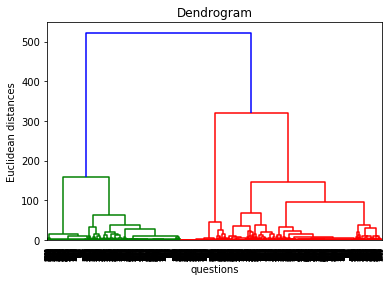

In [32]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset_questions_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

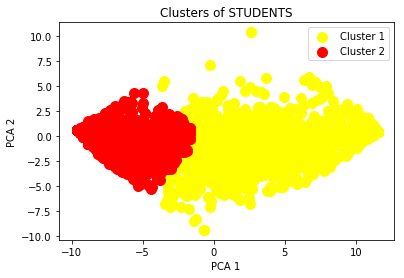

In [33]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset_questions_pca)
X = dataset_questions_pca
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()